# K-Means Clustering

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
def compute_euclidean_distance(vec_1, vec_2):
    """
    Calculates the distance between two vectors, using Euclidean distance.
    Returns the distance as a scalar.
    
    Parameters: 
        vec_1 (np_array) - dataset
        vec_2 (np_array) - centroids
    """
    # Euclidean distance formula:
    # d(x, c) = sqrt(sum((xi - ci)^2))
    distance = np.sqrt(np.sum((vec_1 - vec_2) ** 2))

    # Return distance
    return distance

In [4]:
def initialise_centroids(dataset, k=2):
    """
    Randomly initalizes the starting centroids.
    Returns the starting centroids.
    
    Parameters:
        dataset (np_array) - data values
        k (int) - number of centroids
    """
    # Flip the dataset to get centroids as rows
    col_rows = dataset.T
    
    # Initalize centroids
    centroids = np.zeros((k, col_rows.shape[0]))
    
    # Loop through the number of centroids
    for i in range(k):
        # Select each centroid randomly from the dataset
        centroids[i] = np.random.choice(col_rows[i], col_rows.shape[0])

    # Return centroids
    return centroids

In [293]:
def kmeans(dataset, k=2):
    """
    Used to perform K-Means clustering on a given dataset.
    Returns the centroids and assigned clusters of data.
    
    Parameters:
        dataset (np_array) - data values
        k (int) - number of clusters
    """
    # Set initial values for error calculations
    error_vals = []
    epochs = 1
    
    # Set initial centroids
    centroids = initialise_centroids(dataset, k)
    
    # Assign clusters
    assigned_clusters, error = assign_clusters(dataset, k, centroids)
    error_vals.append(error) # Add error to list
    
    # Update centroids
    while True:
        epochs += 1
        # Create a copy of the closest centroids
        closest_centroids = assigned_clusters.copy()

        # Update new centroids and reassign them
        centroids = update_centroids(dataset, k, centroids, assigned_clusters)
        assigned_clusters, error = assign_clusters(dataset, k, centroids)
        error_vals.append(error) # Add error to list

        # Continue updating until centroids no longer change
        if np.array_equal(closest_centroids, assigned_clusters):
            break
    
    # Return centroids, updated dataset, error values and iteration count
    return centroids, assigned_clusters, error_vals, epochs

In [356]:
def assign_clusters(dataset, k, centroids):
    """
    Used within the K-Means function to assign each given cluster.
    Returns the assigned clusters.
    
    Parameters:
        dataset (np_array) - data values
        k (int) - number of clusters
        centroids (np_array) - current centroids
    """
    # Set initial variables
    distances = np.zeros((len(dataset), k))
    assigned_clusters = np.zeros(len(dataset))
    min_val = np.zeros(len(dataset))
    cluster_classes = np.arange(k, dtype=int)
    
    while True:
        # Calculate distance between each centroid and data point
        for j in range(k):
            for i in range(len(dataset)):
                # Store each data point distance for each centroid in separate array
                distances[i][j] = compute_euclidean_distance(dataset[i], centroids[j])
    
        # Check for closest centroid and set cluster
        assigned_clusters = np.argmin(distances, axis=1)
        
        # Check that all unique clusters are present
        if np.array_equal(np.unique(assigned_clusters), cluster_classes):
            break # Exit loop
        else:
            # Reset random centroids
            centroids = initialise_centroids(dataset, k)
    
    # Calculate aggregate distance of clusters
    error = aggregate_distance(assigned_clusters, dataset, centroids, k)
            
    # Return assigned clusters (labels) and error value
    return assigned_clusters, error

In [383]:
def aggregate_distance(cluster_labels, dataset, centroids, k):
    """
    Used to calculated the aggregate distance between each
    cluster and its data points.
    
    Parameters:
        cluster_labels (array) - assigned clusters
        dataset (array) - main data values
        centroids (array) - current centroids
        k (int) - number of clusters
    """
    # Initialize variables
    error = 0
    cluster_points = []
    
    # Iterate over each cluster
    for i in range(k):
        # Get each clusters points
        points = dataset[np.where(cluster_labels == i)]
        # Convert cluster points to dataframe
        cluster_points.append(pd.DataFrame(points))

    # Iterate over each cluster
    for k in range(len(cluster_points)):
        # Sum cluster features (per row) from centroid individually
        cluster_dist = np.sum((cluster_points[k] - centroids[k]) ** 2)
        
        # Sum each columns features distances together
        error += np.sum(cluster_dist)

    return error

In [384]:
def update_centroids(dataset, k, centroids, clusters):
    """
    Used within the K-Means function to update each centroids position.
    
    Parameters:
        dataset (np_array) - data values
        k (int) - number of clusters
        centroids (np_array) - current centroids
        clusters (np_array) - assigned clusters
    """
    # Calculate new mean for each cluster
    for j in range(k):
        # Get appropriate cluster data
        cluster_data = dataset[clusters == j]
        
        # Set new cluster mean for each column
        centroids[j] = np.mean(cluster_data, axis=0) 
            
    # Return centroids
    return centroids

In [385]:
# Get the data from CSV file
data = pd.read_csv('dog_breeds.csv', sep=',', index_col=False)
data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


In [386]:
# Get the height and tail length as the data
dataset = data.to_numpy()
dataset

array([[5.151, 3.535, 1.414, 0.202],
       [4.949, 3.03 , 1.414, 0.202],
       [4.747, 3.232, 1.313, 0.202],
       ...,
       [6.63 , 3.06 , 5.304, 2.04 ],
       [6.324, 3.468, 5.508, 2.346],
       [6.018, 3.06 , 5.202, 1.836]])

In [403]:
# Run K-Means Clustering - 3 Clusters
centroids, assigned_clusters, error_vals, epochs = kmeans(dataset, k=3)
print(centroids)
print(assigned_clusters)
print(error_vals)
print(epochs)

[[6.95518182 3.12166234 5.81480519 2.09336364]
 [5.08109    3.47942    1.48393    0.24969   ]
 [5.98078862 2.7857561  4.45673171 1.45560163]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0
 0 0 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0
 2 0 0 2]
[5720.000999000007, 640.4038423043718, 359.52334406126374, 221.51601490300675, 184.97982469859465, 167.92317965868796, 163.6517396047387, 163.02720493904064, 162.83244383443665]
9


In [388]:
# Run K-Means Clustering - 2 Clusters
centroids1, assigned_clusters1, error_vals1, epochs1 = kmeans(dataset, k=2)
print(centroids1)
print(assigned_clusters1)
print(error_vals1)
print(epochs1)

[[6.39554639 2.92989691 5.03314433 1.72131443]
 [5.08074528 3.42035849 1.58378302 0.29492453]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[5130.734163000002, 996.6856854114394, 679.5871927733016, 453.28459485382814, 341.96261962507305, 315.5226241390632, 314.3823017046294]
7


<IPython.core.display.Javascript object>


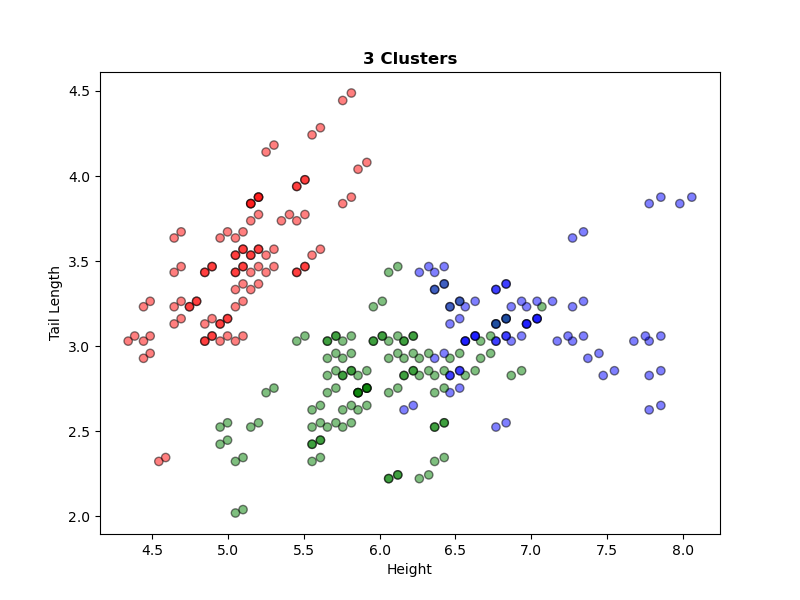

In [280]:
# Create colour map and set cluster colours
colmap = {0: 'b', 1: 'g', 2: 'r'}
colors = [colmap[l] for l in assigned_clusters]

# Plot the data - Height and tail length
fig = plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['tail length'], color=colors, alpha=0.5, edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Tail Length')
plt.title('3 Clusters', fontWeight='bold')
# plt.savefig('3_clusters1.png')
plt.show()

<IPython.core.display.Javascript object>


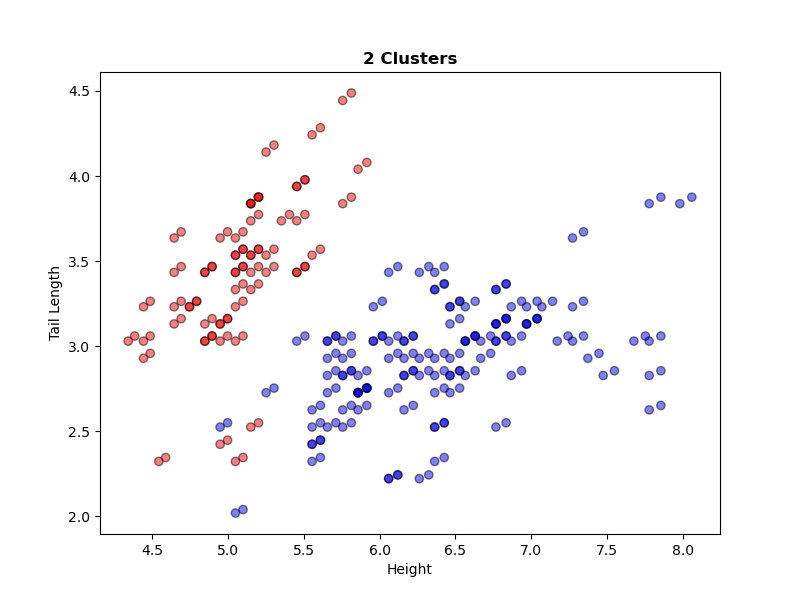

In [282]:
# Create colour map and set cluster colours
colmap1 = {0: 'b', 1: 'r'}
colors1 = [colmap1[l] for l in assigned_clusters1]

# Plot the data - Height and tail length
fig = plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['tail length'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Tail Length')
plt.title('2 Clusters', fontWeight='bold')
# plt.savefig('2_clusters1.png')
plt.show()

<IPython.core.display.Javascript object>


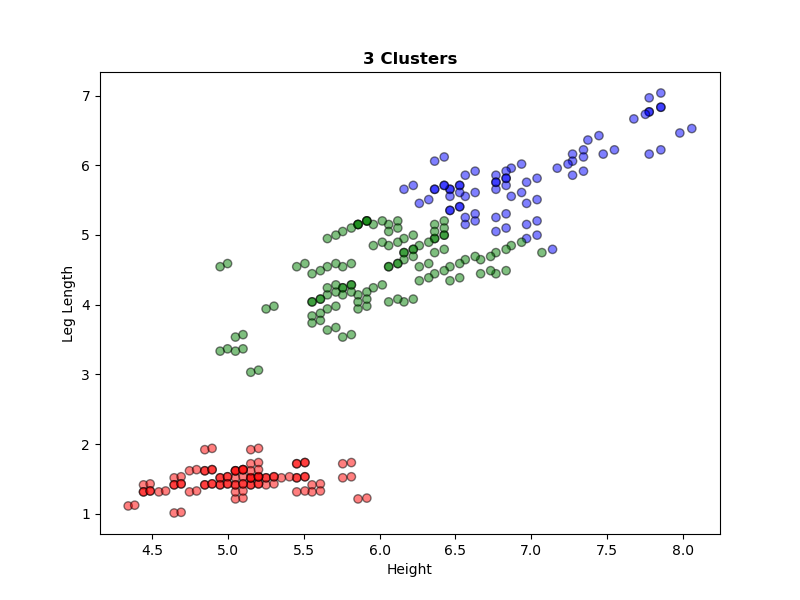

In [283]:
# Plot the data - Height and tail length
fig = plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['leg length'], color=colors, alpha=0.5, edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Leg Length')
plt.title('3 Clusters', fontWeight='bold')
# plt.savefig('3_clusters2.png')
plt.show()

<IPython.core.display.Javascript object>


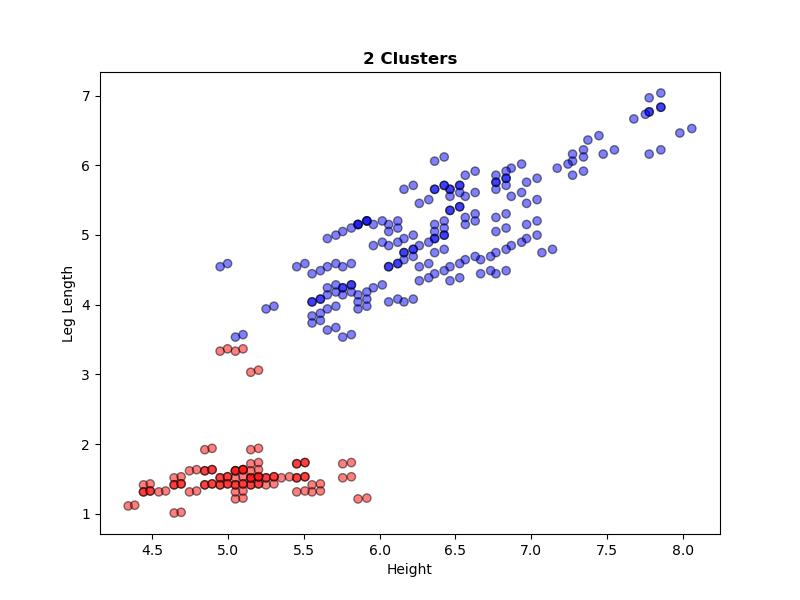

In [284]:
# Plot the data - Height and tail length
fig = plt.figure(figsize=(8, 6))
plt.scatter(data['height'], data['leg length'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlabel('Height')
plt.ylabel('Leg Length')
plt.title('2 Clusters', fontWeight='bold')
# plt.savefig('2_clusters2.png')
plt.show()

<IPython.core.display.Javascript object>


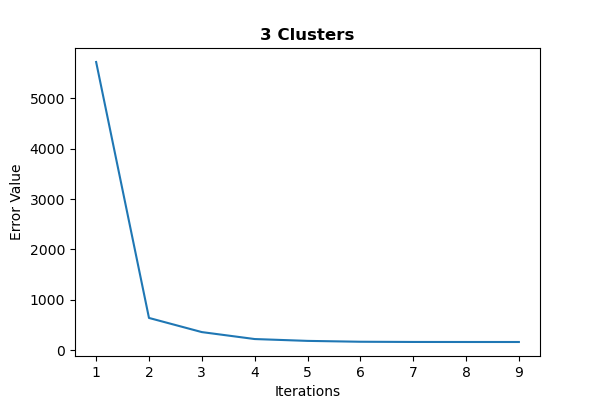

In [405]:
# Plot the data - Iterations and Error values
iterations = range(1, epochs+1)

fig = plt.figure(figsize=(6, 4))
plt.plot(iterations, error_vals)
plt.xlabel('Iterations')
plt.ylabel('Error Value')
plt.title('3 Clusters', fontWeight='bold')
# plt.savefig('3_clusters_error.png')
plt.show()

<IPython.core.display.Javascript object>


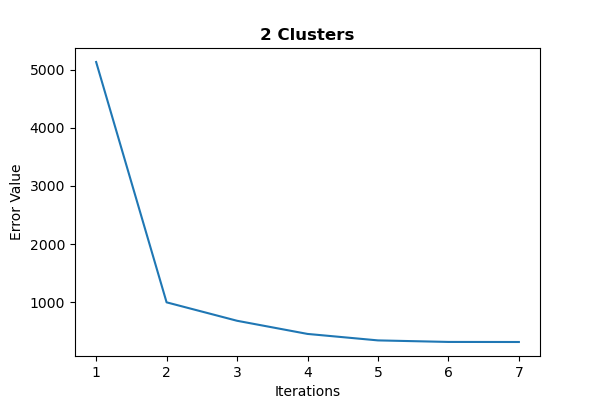

In [390]:
# Plot the data - Iterations and Error values
iterations1 = range(1, epochs1+1)

fig = plt.figure(figsize=(6, 4))
plt.plot(iterations1, error_vals1)
plt.xlabel('Iterations')
plt.ylabel('Error Value')
plt.title('2 Clusters', fontWeight='bold')
# plt.savefig('2_clusters_error.png')
plt.show()